In this file, we will focus on 3 sections:
- 1. Gradient descent
- 2. Gradient descent variants: Batch GD, Mini-batch GD and Stochastics GD (SGD)
- 3. Gradient descent optimization algorithms.

## 1. Gradient Descent

**Definition [Wikipedia].** `Gradient descent` is a `first-order iterative optimization algorithm` for finding a **`local minimum`** of a `differentiable function`. To find a local minimum of a function using `gradient descent`, we take steps `proportional` to the `negative of the gradient` (or approximate gradient) of the function `at the current point`:

$$ x_{n+1} = x_n - \eta \nabla F(x_n) $$

----------------------------

### Opening example to the motivation. 
Let's consider the `convex optimization problem`:

$$ \theta^{*} = \underset{\theta\in\Theta}{\text{argmin}} f\left(\textbf{x},\theta\right) $$

where $f$ be a `convex` function and $\Theta$ is a `parameter space`. For instance:

- In `linear regression`, we want to find the coeficient of a hyperplane via

$$ \beta^{*} = \underset{\theta\in\Theta}{\text{argmin}} \left \Vert \textbf{Y} - \mathcal{X} \beta \right\Vert^2 $$

and $f\left(\textbf{x}, \beta \right) = \left \Vert \textbf{Y} - \mathcal{X} \beta \right\Vert^2$ be a convex function.

- In `soft-margin SVM`, that is

$$ \left(\textbf{w}^{*},b^{*}, \xi^{*}\right) = \underset{\left(\textbf{w}, b, \xi\right)}{\text{argmin}} \frac{1}{2} \Vert\textbf{w}\Vert_{2}^2 + C \sum_{n=1}^N \xi_n, $$

- In the `maximum likelihood estimator`, we can consider minimizing the `score-function`

$$ \theta^{*} = \underset{\theta\in\Theta}{\text{argmin}} \left( - \sum_{k = 1}^N  \log P\left(x_{k}\left|\theta\right.\right)  \right) $$

since $\left(\textbf{x}, \theta \right) = - \sum_{k = 1}^N \log P\left(x_{k}\left|\theta\right.\right) $ be the sum of the convex functions: $-\log P\left(x_{k}\left|\theta\right.\right)$.

-------------------------------------

But if there exists some `constraints` be `nonconvex` in our problem, what will we do? 

`Gradient descent` is a popular alternative because it is simple and it gives some kind of meaningful result for both convex and nonconvex optimization. It tries to improve the function value by moving in a direction related to the gradient (i.e., the first derivative).
- For `convex` optimization it gives the `global optimum` under fairly general conditions. 
- For `nonconvex` optimization it arrives at a `local optimum`.

------------------------------------

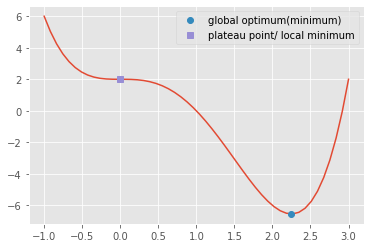

In [1]:
## ---------------------------- Hiden code ---------------------------

The function in figure above is defined by 

$$ f(x) = x^4 - 3x^3 + 2 $$

We can see that $f$ is a nonconvex functions, and the `local optimum` is different from the `global optimum` $\left( x = \dfrac{9}{4} \right)$.

To imagine easier this algorithm, we consider the quadratic form, such as $f(x) = x^2$.

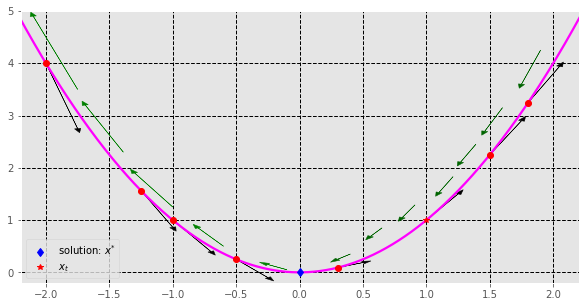

In [2]:
## ------------------------ Hiden code ------------------------------ ##

**First idea.**

$$ x_{t+1} = x_t + \Delta_t , \quad t = 1,2, \ldots $$

**Algorithm**

-------------------------
**(Initialize)** First, starting at somewhere on the cost function $f(x) = x^2$, we take our first step `downhill` in the `direction` specified by the `negative gradient`. For example;

- If $f'(x_t) > 0$, then $x_t$ is in the `right` of $x^{*}$; to obtain the next $x_{t+1}$ is nearer $x^{*},$ we must `shift` $x_t$ to the `left`!!
- Likewise, if $f'(x_t) < 0$ then $x_t$ is in the `left` of $x^{*},$ then we will shift it to the `right`.

Hence, for each $t$, the $\Delta_t = x_{t+1} - x_t$ is proportional to the `negative gradient` $-\nabla f(x_t)$; sometimes we called this is the `steepest descent` or `antigradient`!

**(Iterate)** Next, we `recalculate the negative gradient` (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the `bottom` $x^{*} = 0$ of our graph, or to a point where we can no longer move downhill–a `local minimum`.

The size of these steps is called the **`learning rate`** $\eta$. 
- With a `high learning rate` we can cover more ground each step, but we risk `overshooting` the `lowest point` since the slope of the hill is constantly changing. 
- With a very `low learning rate`, we can confidently `move in the direction` of the `negative gradient` since we are `recalculating` it so frequently. 
- A `low learning rate` is more precise, but calculating the gradient is `time-consuming`, so it will take us a very long time to get to the bottom.

----------------------------

$$ \begin{array}{lcrl} \text{intitialize :} & x_0 & & \\ \text{iterate :} & x_{t+1} = x_t - \eta \nabla f(x_t) , \quad \end{array} $$

-------------------------

Therefore, we can describe the main idea behind gradient descent as climbing down a hill until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient where the step size is determined by the value of the `learning rate` , as well as the `slope of the gradient`.

**Computational examples on univariate.** 

For example, we consider the `nonconvex` function

$$ f(x) = x^2 + x - 3 \sin(x) - 4 \cos(x) $$

and obviously,

$$ \nabla f(x) = 2x +1 - 3 \cos(x) + 4\sin(x) = 0$$

Look at the image below

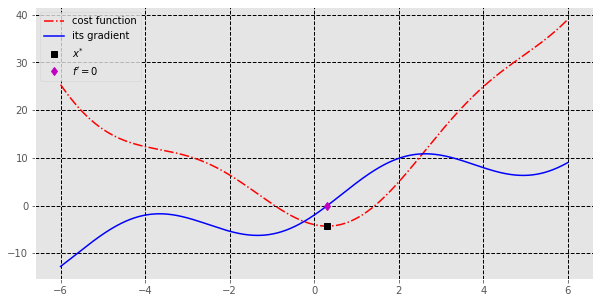

In [3]:
t = np.linspace(-6, 6, 1001)

def cost(x):
    return x**2 + x - 3*np.sin(x) - 4*np.cos(x)

def grad(x):
    return 2*x + 1 - 3*np.cos(x) + 4*np.sin(x)

a, b, c = 0.312493, grad(0.312493), cost(0.312493)

_ = plt.figure(figsize = (10, 5))
_ = plt.grid(color='k', linestyle='--', linewidth=1)
_ = plt.plot(t, cost(t), 'r-.', label = 'cost function')
_ = plt.plot(t, grad(t), 'b-', label = 'its gradient')
_ = plt.plot([a], [c], 'ks', label = '$x^{*}$')
_ = plt.plot([a], [b], 'md', label = "$f' = 0$")
_ = plt.legend()

By solving the Eq $\nabla f = 0$, we found
$$ x^{*} \approx 0.312493 $$

In [4]:
def myGD1(x0, eta = 0.001, max_iters = 10000, epsilon = 1e-6):
    x = [x0]
    for it in range(max_iters):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < epsilon:
            break
        x.append(x_new)
    return (x, it)

(x1, it1) = myGD1(5, 0.1, 10000)
(x2, it2) = myGD1(5, 0.01, 10000)
(x3, it3) = myGD1(5, 0.001, 10000)
(x4, it4) = myGD1(5, 0.01, 10000, 1e-4)
(x5, it5) = myGD1(5, 0.7, 10000)
(x6, it6) = myGD1(5, 0.7, 10000, 1e-2)
(x7, it7) = myGD1(1, 0.7, 10000, 1)
(x8, it8) = myGD1(1, 0.1, 10000)

print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))
print('Solution x3 = %f, cost = %f, obtained after %d iterations'%(x3[-1], cost(x3[-1]), it3))
print('Solution x4 = %f, cost = %f, obtained after %d iterations'%(x4[-1], cost(x4[-1]), it4))
print('Solution x5 = %f, cost = %f, obtained after %d iterations'%(x5[-1], cost(x5[-1]), it5))
print('Solution x6 = %f, cost = %f, obtained after %d iterations'%(x6[-1], cost(x6[-1]), it6))
print('Solution x7 = %f, cost = %f, obtained after %d iterations'%(x7[-1], cost(x7[-1]), it7))
print('Solution x8 = %f, cost = %f, obtained after %d iterations'%(x8[-1], cost(x8[-1]), it8))


Solution x1 = 0.312493, cost = -4.318431, obtained after 18 iterations
Solution x2 = 0.312493, cost = -4.318431, obtained after 267 iterations
Solution x3 = 0.312493, cost = -4.318431, obtained after 2750 iterations
Solution x4 = 0.312508, cost = -4.318431, obtained after 201 iterations
Solution x5 = -2.593396, cost = 9.109615, obtained after 9999 iterations
Solution x6 = -2.494110, cost = 8.726434, obtained after 3360 iterations
Solution x7 = -2.464693, cost = 8.607232, obtained after 16 iterations
Solution x8 = 0.312493, cost = -4.318431, obtained after 13 iterations


**Comments.**
- 1. The smaller `learning rate` $\eta << 0.1$, the slower `rate of convergence` (look at `x3` with $\eta = 0.001$).
- 2. But the high `learning rate`, sometimes we can not complete the iteration (look at `x5` with $\eta = 0.7$).
- 3. The higher `epsilon` gives the better `convergence rate` but the `final result` get a `big error` (see `x5, x6`).
- 4. If the `choosing` $x_0$ is near the solution $x^{*}$ ; the `rate of convergence` will be faster but the final result may be incorrect (see `x7`) while `x8` is correct and the `rate of convergence` is faster because we choose the better `learning rate`

--------------------------------

**Sumarization**
- Because we need to calculate the gradients for the whole dataset to perform just one update, `gradient descent` can be very slow and is intractable for datasets that don't fit in memory.

- For a `pre-defined` number of epochs, we first compute the `gradient vector:` of the `loss function` for the whole dataset w.r.t. our parameter vector gradient. Note that state-of-the-art deep learning libraries provide automatic differentiation that efficiently computes the gradient w.r.t. some parameters. If you derive the gradients yourself, then `gradient checking` is a good idea. 

- We then update our parameters in the opposite direction of the gradients with the learning rate determining how big of an update we perform. `Gradient descent` is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.

--------------------------------

**Example 2. `gradient checking`** in the `simple linear regression`. As we known the loss function here defined by

$$ \mathcal{L} \left( \textbf{w} \right) = \dfrac{1}{2N} \left \Vert \textbf{Y} - \mathcal{X} \textbf{w} \right\Vert^2 $$

hence its gradient is

$$ \nabla_{\textbf{w}} \mathcal{L} \left( \textbf{w} \right) = \dfrac{1}{2N} \mathcal{X}^T \left(\mathcal{X} \textbf{w} - \textbf{Y} \right) $$

where $ \mathcal{X} =$  $\left(\begin{array}{cc} 1 & x_{1}\\ 1 & x_{2}\\ \vdots & \vdots\\ 1 & x_{N} \end{array}\right)$ and $\textbf{w} = \left( w_{0}, w_{1} \right)^T$.

In [5]:
X0 = np.random.rand(1000, 1)

def loss(w, X):    
    one = np.ones((X.shape[0],1))
    Xbar = np.concatenate((one, X), axis = 1)
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w, X):
    one = np.ones((X.shape[0],1))
    Xbar = np.concatenate((one, X), axis = 1)
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def numerical_grad(w, loss, X):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (loss(w_p, X) - loss(w_n, X))/(2*eps)
    return g 

def check_grad(w, loss, grad, X):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w, X)
    grad2 = numerical_grad(w, loss, X)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), loss, grad, X0))

Checking gradient... True


**Example 3. Using `gradient descent` to find the `regression coeficients`**

Solution found by gradient descent: W =  0.5016608188854302 , b = 0.037671962123031 , and loss =  0.005199967216232899 ,
after 2303 iterations.

By ordinary least square regression : W =  0.5336295728298994 & b =  0.024269488192463808


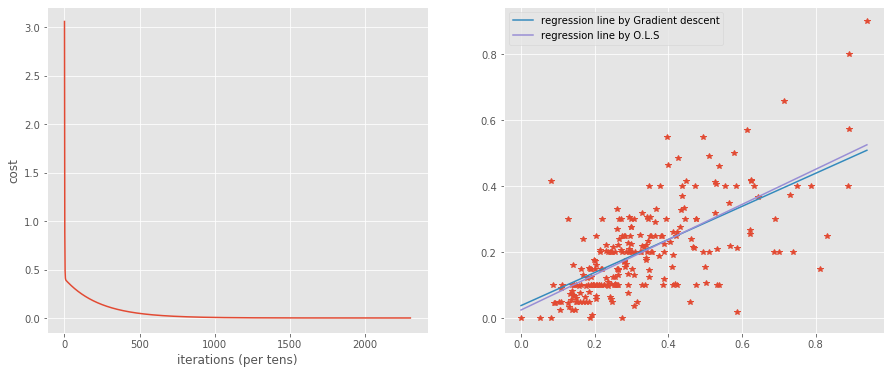

In [6]:
import seaborn as sns

tips = sns.load_dataset('tips')
X = tips['total_bill'].values
X = (X - X.min())/X.max()
Y = tips['tip'].values
Y = (Y - Y.min())/Y.max()
t = np.linspace(X.min(), X.max(), 2)

costs = []

#Step 1: Parameter initialization 
W = 2
b = 2

for i in range(1, 50000):
#Step 2: Calculate Cost function
    Y_pred = np.multiply(W, X) + b
    Loss_error = (Y_pred - Y)**2
    cost = 0.5*np.mean(Loss_error)
    
#Step 3: Calculate dW and db    
    db = np.mean((Y_pred - Y))
    dw = np.dot((Y_pred - Y), X)
    costs.append(cost)

#Step 4: Update parameters:
    W = W - 0.01*dw
    b = b - 0.01*db
    if cost < 52e-4:
        break

print('Solution found by gradient descent: W = ', W, ", b =", b, ', and loss = ',cost, ',\nafter %d iterations.' %(i))
            
pred1 = W*t + b

from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = False) # fit_intercept = False for calculating the bias
one = np.ones((X.shape[0], 1))
X_bar = np.concatenate((one, X.reshape(-1,1)), axis = 1)
lm.fit(X_bar, Y)
b2, W2 = lm.coef_ 
print("\nBy ordinary least square regression : W = ", W2, "& b = ",  b2)

plt.figure(figsize = (15, 6) )
plt.subplot(121)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')

pred2 = W2*t + b2

plt.subplot(122)
plt.plot(X, Y, '*')
plt.plot(t, pred1, label = 'regression line by Gradient descent')
plt.plot(t, pred2, label = 'regression line by O.L.S')

plt.legend()

**Example 3. Gradient descent on high dimension space**

Now, we consider

$$ f(x, y) = (x^2 + y - 7)^2 + (x - y + 1)^2 $$

We have

$$ \nabla f(x, y) = \left( \begin{array}{c} 4x(x^2 + y- 7) + 2(x-y+1) \\ 2(x^2+y-7)-2(x-y+1) \end{array} \right) $$

Obviously, we have 2 global minimum be $(2, 3)$ and $(-3, -2)$. First, starting at $(x_0, y_0) = (4, 5)$ and we expect the solution be $(2, 3)$.

Read later:  https://github.com/Shathra/gradient-descent-demonstration  (monday next week)

In [7]:
def f(x, y):
    return (x**2 + y - 7)**2 + (x - y + 1)**2

def fdx(x, y):
    return 4*x*(x**2 + y -7) + 2*(x - y + 1)

def fdy(x, y):
    return 2*(x**2 + y - 7) - 2*(x - y + 1)

def myGD2(next_x, next_y, eta = 1e-6, max_iters = 10000):
    for _ in range(max_iters):
        current_x = next_x
        current_y = next_y
        next_x = current_x - eta * fdx(current_x, current_y)
        next_y = current_y - eta * fdy(current_x, current_y)

        step = np.sqrt((next_x - current_x)**2 + (next_y - current_y)**2)

        if abs(step) <= 1e-5:
            break
    return [next_x, next_y]

next_x, next_y = myGD2(4,5, 0.001, 5000)

print("Minimum at ", next_x)
print("Minimum at ", next_y)
print("after", _, "iterations")

Minimum at  1.9993378650597406
Minimum at  3.0034379111123664
after Legend iterations


Let see the moving after each per 500 iterations; starting at `(4, 5)`

In [8]:
for iters in range(0,10000, 500):
    x1, y1 = myGD2(4, 5, 1e-3, max_iters = iters)
    print("iters = ", iters, ",\t x = ", round(x1, 4), ",\t y = ", round(y1, 4))

iters =  0 ,	 x =  4 ,	 y =  5
iters =  500 ,	 x =  1.9235 ,	 y =  3.3938
iters =  1000 ,	 x =  1.9818 ,	 y =  3.0943
iters =  1500 ,	 x =  1.9956 ,	 y =  3.0227
iters =  2000 ,	 x =  1.9989 ,	 y =  3.0055
iters =  2500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  3000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  3500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  4000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  4500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  5000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  5500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  6000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  6500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  7000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  7500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  8000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  8500 ,	 x =  1.9993 ,	 y =  3.0034
iters =  9000 ,	 x =  1.9993 ,	 y =  3.0034
iters =  9500 ,	 x =  1.9993 ,	 y =  3.0034


Likewise, starting at `(-4, -1)`, and we expect the obtaining values be `(-3, -2)`

In [9]:
for iters in range(0,10000, 500):
    x2, y2 = myGD2(-4, -1, 1e-3, max_iters = iters)
    print("iters = ", iters, ",\t x = ", round(x2, 4), ",\t y = ", round(y2, 4))

iters =  0 ,	 x =  -4 ,	 y =  -1
iters =  500 ,	 x =  -2.9171 ,	 y =  -1.577
iters =  1000 ,	 x =  -2.9569 ,	 y =  -1.7785
iters =  1500 ,	 x =  -2.9776 ,	 y =  -1.8843
iters =  2000 ,	 x =  -2.9883 ,	 y =  -1.9396
iters =  2500 ,	 x =  -2.9939 ,	 y =  -1.9685
iters =  3000 ,	 x =  -2.9968 ,	 y =  -1.9836
iters =  3500 ,	 x =  -2.9984 ,	 y =  -1.9915
iters =  4000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  4500 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  5000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  5500 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  6000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  6500 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  7000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  7500 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  8000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  8500 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  9000 ,	 x =  -2.9986 ,	 y =  -1.9925
iters =  9500 ,	 x =  -2.9986 ,	 y =  -1.9925


Plot the final solutions by the contourf and see the shape $z = f(x, y)$

Text(0.5, 1.0, 'contour plot of $f$')

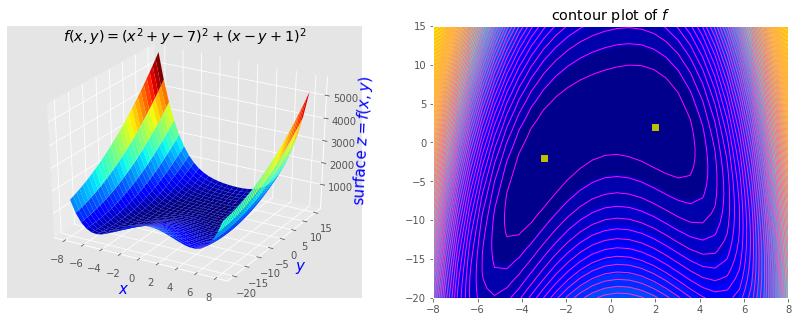

In [10]:
from mpl_toolkits import mplot3d

x = np.linspace(-8, 8, 30)
y = np.linspace(-20, 15, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (14, 5) )
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='jet', edgecolor='none', linewidth=1)
ax.set_xlabel('$x$', fontsize=15, labelpad= 3, color='blue')
ax.set_ylabel('$y$', fontsize=15, labelpad= 3, color='blue')
ax.set_zlabel('surface $z = f(x, y)$', fontsize=15, labelpad= 3, color='blue');
ax.set_title("$f(x, y) = (x^2 + y - 7)^2 + (x - y + 1)^2$")

ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, levels = 80 , linewidths=1, cmap = plt.cm.spring)
ax.plot([x1, x2], [x1, y2], 'ys')
ax.contourf(X, Y, Z, 50, cmap = 'jet')
ax.set_title("contour plot of $f$")

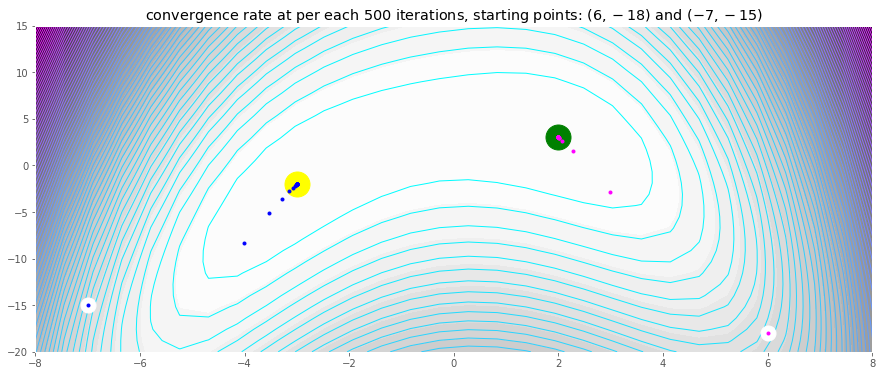

In [11]:
plt.figure(figsize = (15, 6))
plt.contour(X, Y, Z, levels = 80 , linewidths=1, cmap = plt.cm.cool)
plt.contourf(X, Y, Z, 50, cmap = 'binary')
plt.title("convergence rate at per each 500 iterations, starting points: $(6, -18)$ and $(-7, -15)$")

plt.plot([6, -7], [-18, -15], 'wo', markersize = 15)

plt.plot(2, 3, color = 'green', marker = 'o', markersize = 25)
plt.plot(-3, -2, color = 'yellow', marker = 'o', markersize = 25)

for iters in range(0, 10000, 500):
    x1, y1 = myGD2(6, -18, 1e-3, max_iters = iters)
    x2, y2 = myGD2(-7, -15, 1e-3, max_iters = iters)
    plt.plot(x1, y1, color = 'magenta', marker = 'o', markersize = 3)
    plt.plot(x2, y2, color = 'blue', marker = 'o', markersize = 3)

In the last example in this section, we create a `regression line` $$ y = 4 + 3x $$ by generating the data-point surround it.



In [12]:
X = np.random.rand(200, 1)
y = 4 + 3 * X + 0.25*np.random.randn(200, 1)
########################################################################################
def  cal_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2, j))
    y     = Actual y's np.zeros((2, 1))    
    where:
        j is the number of features
    '''   
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
########################################################################################
def GD3(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate : default = 0.01
    iterations = number of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)        
    return theta, cost_history, theta_history
########################################################################################
lr =0.01
n_iter = 1000
########################################################################################
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
########################################################################################
theta, cost_history, theta_history = GD3(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.235,
Theta1:          2.502
Final cost/MSE:  2171.561


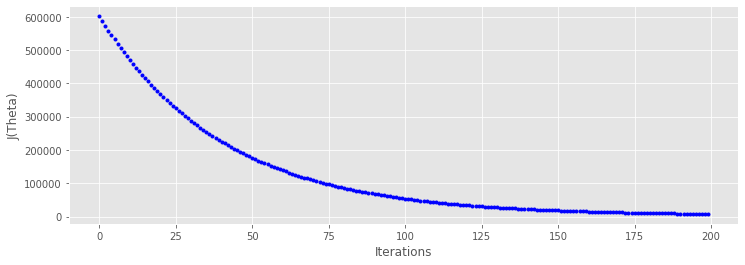

In [13]:
fig,ax = plt.subplots(figsize = (12, 4))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(200), cost_history[ : 200], 'b.')

Plot the graphs for different iterations and learning rates combination

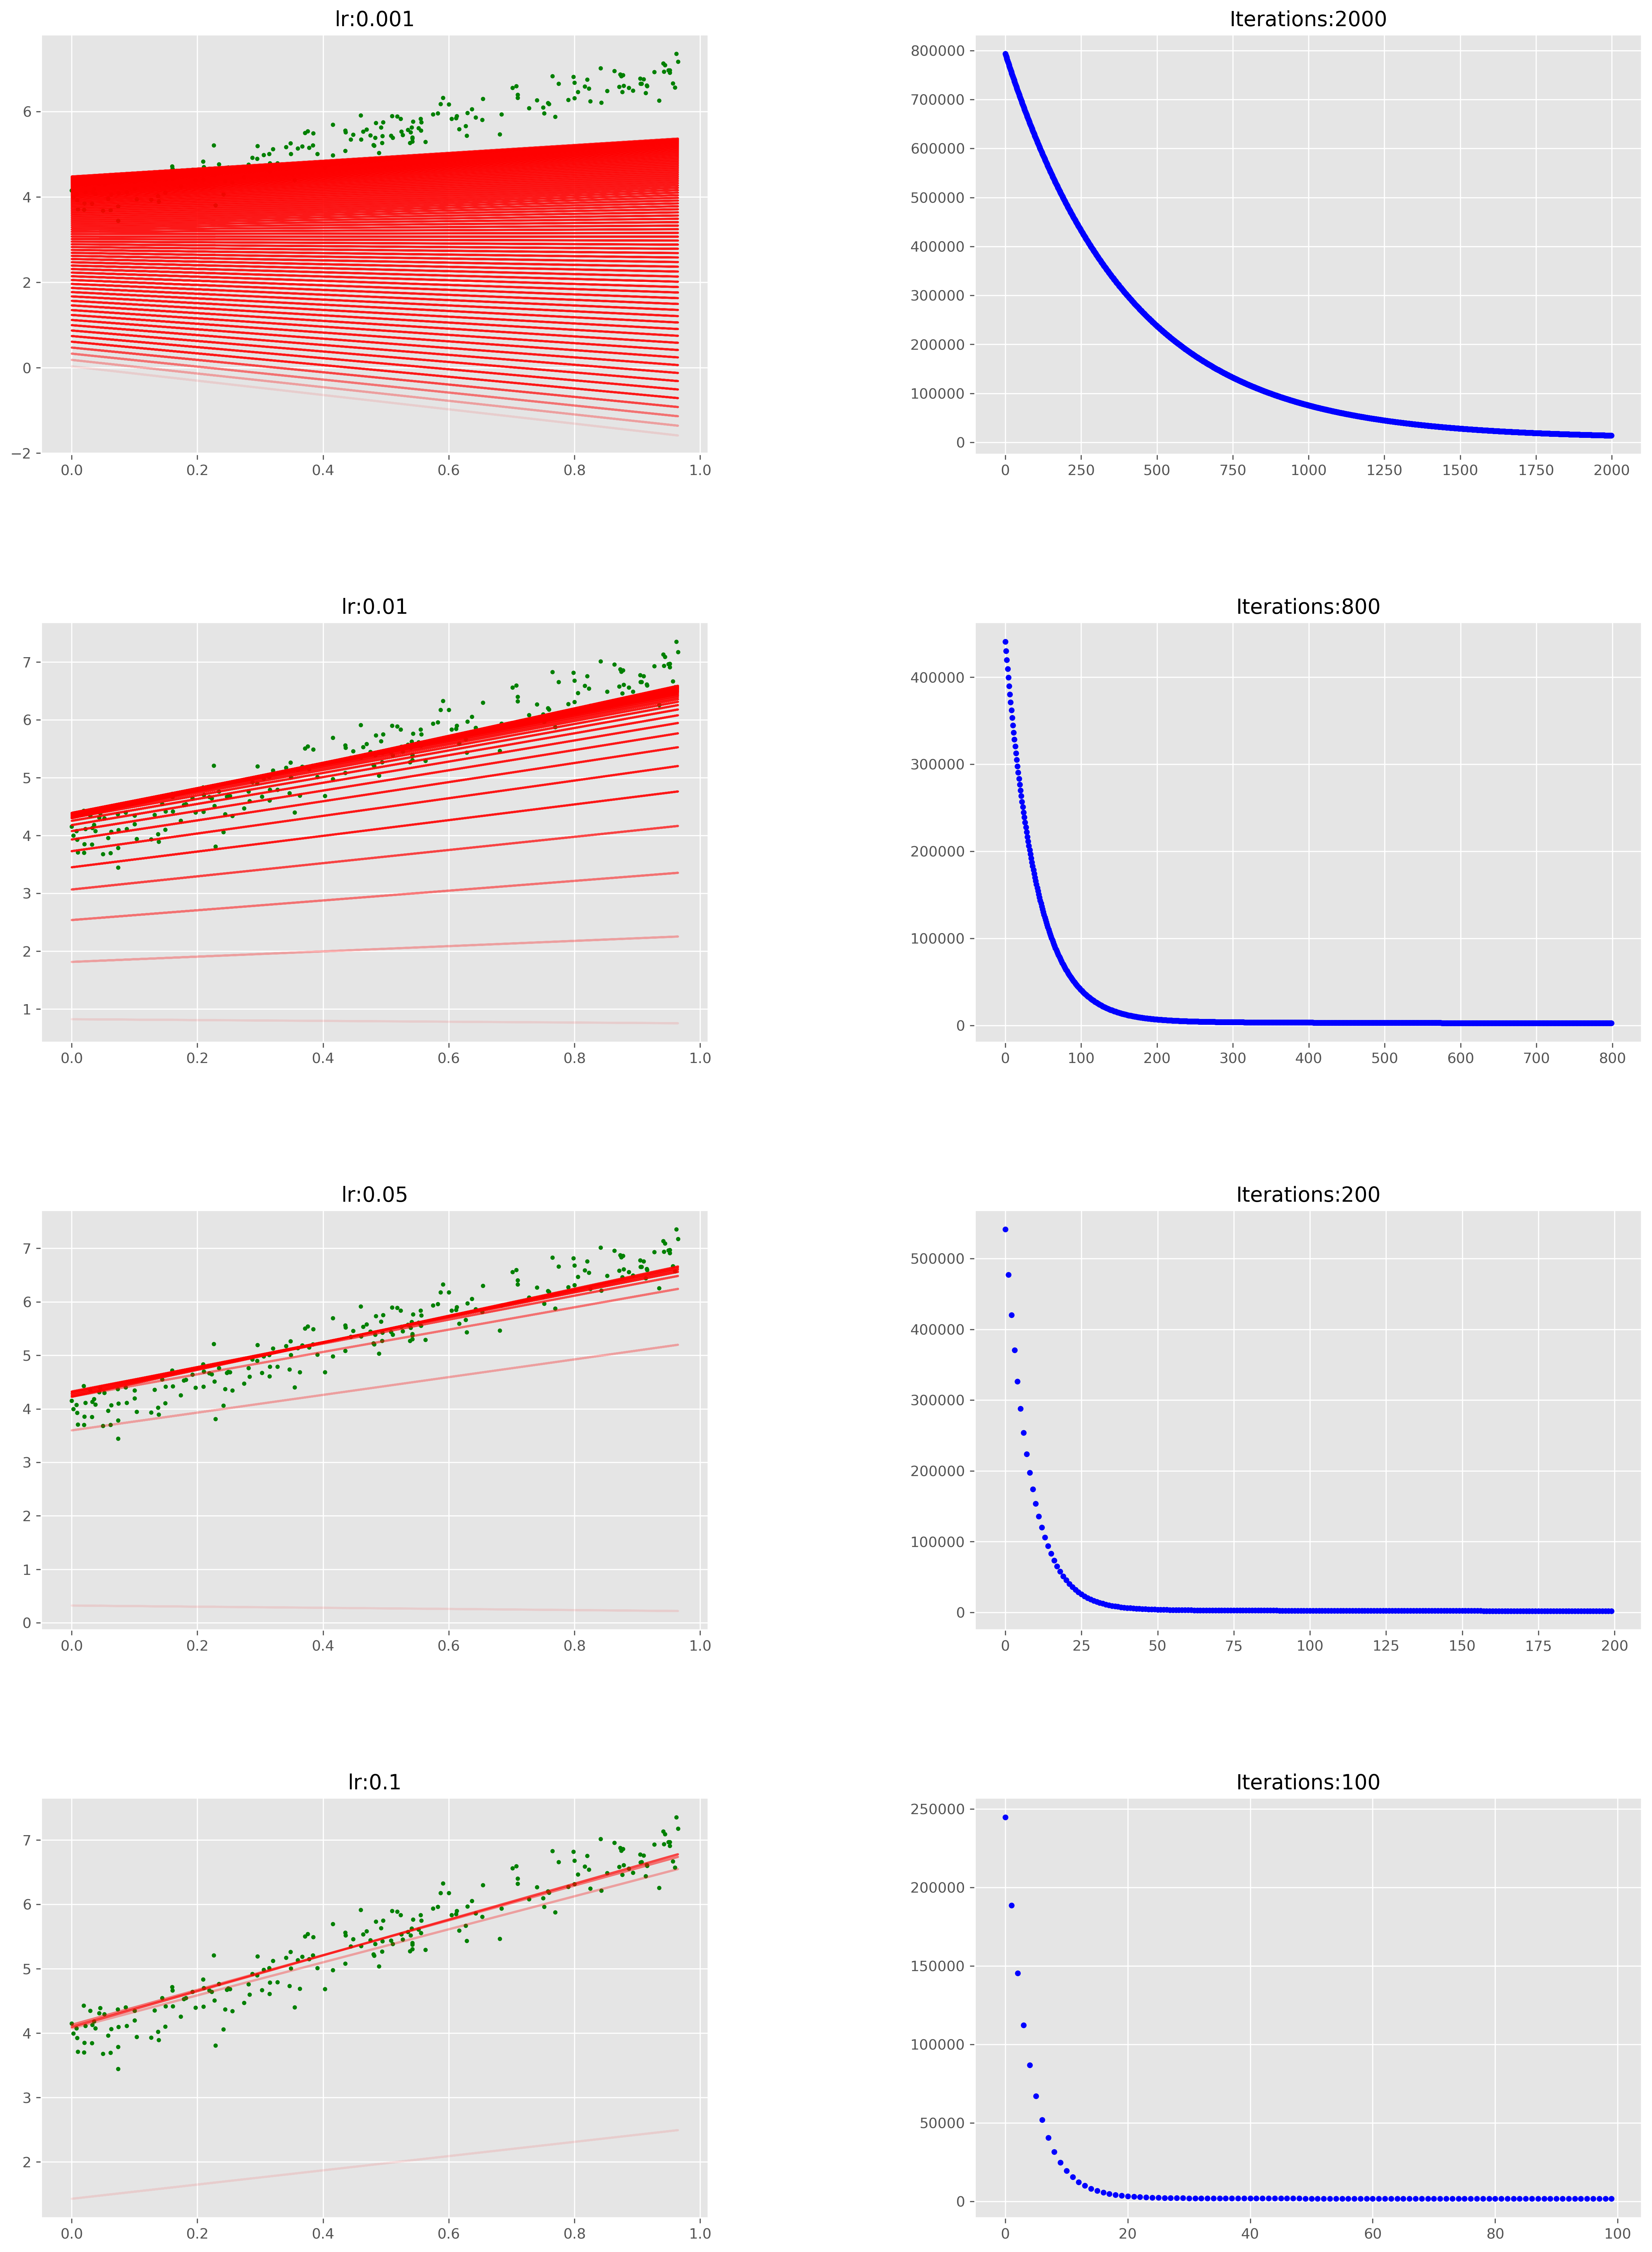

In [14]:
def plot_GD(n_iter, X, y, lr, ax, ax1 = None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot
    """
    theta = np.random.randn(2, 1)
    X_b = np.c_[np.ones((len(X), 1)), X]
    _ = ax.plot(X, y, 'g.', markersize = 4)
    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = GD3(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)
        cost_history[i] = h[0]
        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
        if not ax1== None:
            _ = ax1.plot(i, cost_history[i], 'b.')
            
fig = plt.figure(figsize = (20, 28), dpi = 300)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

it_lr =[(2000, 0.001), (800, 0.01), (200, 0.05), (100, 0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4, 2, count)
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, X, y, lr, ax, ax1)

## 2. Gradient descent variants

There are three variants of gradient descent, which differ in how much data we use to compute the gradient of the `objective function`. Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

### 2.1. Batch gradient descent (`BGD`).
That is what we discussed in the preceding section

$$ \theta_{t + 1} = \theta_t + \eta \nabla_{\theta} J \left( \theta_t \right) $$

where $J$ is the `loss function`. 

### 2.2. Stochastic gradient descent (`SGD`)

`Stochastic gradient descent` (SGD) in contrast performs a parameter update for **each training example** $\textbf{x}_n$ and the label $y_n$, that is

$$ \theta_{t + 1} = \theta_t - \eta \nabla_{\theta} J \left( \theta, \textbf{x}_t, y_t \right) $$

where $(x_t, y_t)$ is a shuffle data.

--------------------------------------- 

**Algorithm.** 

      for i in **range**(max_iters):
    
      np.random.shuffle(data)  (or using `indices = np.random.permutation(N) or np.random.randint(0, N)` to instead)
      
      for observations in data:
      
            params_grad = evaluate_gradient(loss_function, observations, params)
        
            params = params - learning_rate * params_grad

-------------------------------------------

For example, in the `linear regression problem`, we have
$$ \mathcal{L} \left( \textbf{w}, \textbf{x}_n, y_n \right) = \dfrac{1}{2} \left \Vert y_n - \mathcal{x}_n \textbf{w} \right\Vert^2 $$
and
$$ \nabla_{\textbf{w}} \mathcal{L} \left( \textbf{w}, \textbf{x}_n, y_n \right) = \dfrac{1}{2} \mathcal{x}_n^T \left(\mathcal{x}_n \textbf{w} - y_n \right) $$

----------------------

`BGD` performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. `SGD` does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online. 

`SGD` performs frequent updates with a `high variance` that cause the objective function to `fluctuate heavily` 

(see: https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png )

----------------------
In the example below, we let $\textbf{w} = \theta $ for the `SGD` in `linear regression`

In [15]:
def SGD(X,y,theta,learning_rate=0.01, iterations=10):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations 
    Returns the final theta vector and array of cost history over no of iterations
    '''
    N = len(y)
    cost_history = np.zeros(iterations)    
    for it in range(iterations):
        cost = 0.0
        for i in range(N):
            rand_ind = np.random.randint(0, N)  ## shuffle dataset by select a random integer in [0, N]
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta -(1/N) * learning_rate * ( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it]  = cost        
    return theta, cost_history

def  cal_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))    
    where:
        j is the no of features
    '''
    predictions = X.dot(theta)
    cost = (1/2) * np.mean((predictions-y)**2)
    return cost

Verify the solution

In [16]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = SGD(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.976,
Theta1:          3.011
Final cost/MSE:  8.189


Display the `loss function` $J(\theta)$ after `50` iterations

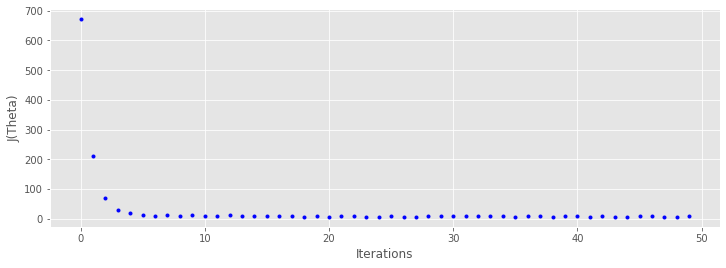

In [17]:
fig,ax = plt.subplots(figsize=(12, 4))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

**Comments.**
- While batch gradient descent converges to the minimum of the basin the parameters are placed in, SGD's fluctuation, on the one hand, enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. 
- However, it has been shown that when we slowly decrease the learning rate, SGD shows the same convergence behaviour as batch gradient descent, almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively.
- Its code fragment simply adds a loop over the training examples and evaluates the gradient w.r.t. each example. 
- Noting that we shuffle the training data at every epoch.

### 2.3. Mini Batch Gradient Descent (`MBGD`)

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every `mini-batch` of $n$ `training example`.

$$ \theta_{t+1} = \theta_t - \eta \nabla_{\theta} J \left( \theta_t, \textbf{x}^{[t : t + n]}, y^{[t: t+n]} \right) $$

This approach: 
- 1) reduces the variance of the parameter updates, which can lead to more stable convergence; 
- 2) make use of highly optimized matrix optimizations common to state-of-the-art deep learning libraries that make computing the gradient w.r.t. a mini-batch very efficient. Common `mini-batch sizes` range between `50 and 256`, but can vary for different applications. 

*`Mini-batch gradient descent` is typically the algorithm of choice when training a neural network and the term SGD usually is employed also when mini-batches are used.* 

Note: In modifications of SGD in the rest of this post, we leave out the parameters $\textbf{x}^{i : i + n}, y^{ i : i + n}$

**Algorithm.**

    for i in range(nb_epochs):
    
      np.random.shuffle(data) (or using `indices = np.random.permutation(len(data))` to instead)
      
      for batch in get_batches(data, batch_size=50):
      
        params_grad = evaluate_gradient(loss_function, batch, params)
        
        params = params - learning_rate * params_grad

In [18]:
def minibatch_gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 10, batch_size = 50):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [19]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.079,
Theta1:          2.812
Final cost/MSE:  0.162


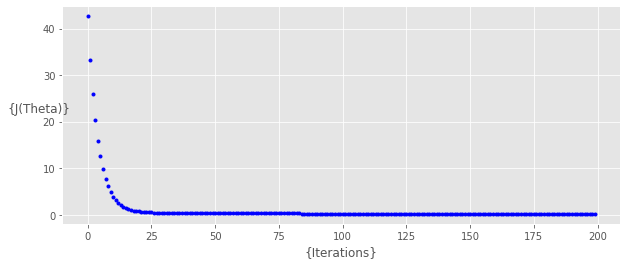

In [20]:
fig,ax = plt.subplots(figsize=(10, 4))
ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter),cost_history,'b.')

## 3. Some gradient descent optimization algorithms.

In the following, we will outline some algorithms that are widely used by the deep learning community to deal with the aforementioned challenges. We will not discuss algorithms that are infeasible to compute in practice for high-dimensional data sets, e.g. second-order methods such as `Newton's method`.

### 3.1. Momentum.

`SGD` has trouble navigating ravines, for a `starting point` $x_0$, then the `stepest` be common around `local optima`.

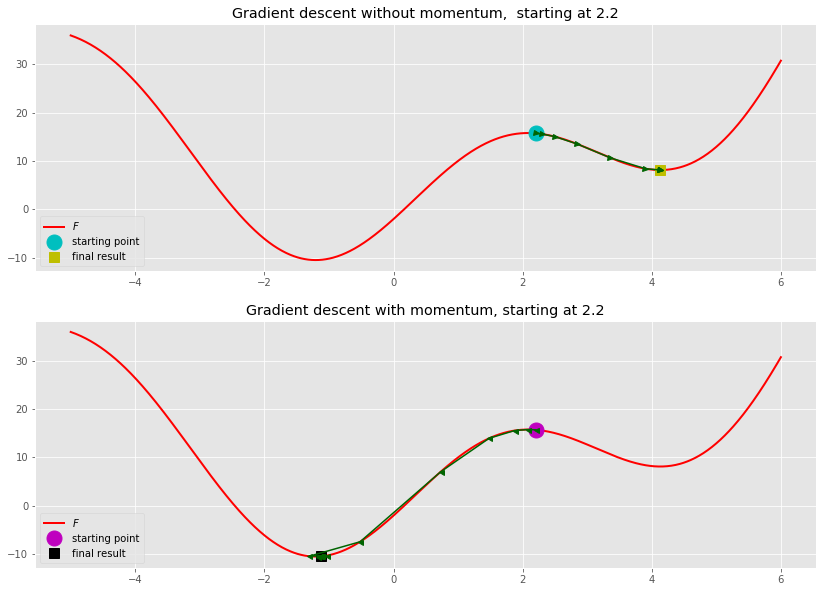

In [21]:
## --------------------------------- Hiden code

We can see that, starting at $x_0 = 2.2$,

- The `GD without momentum` attain the `local minimum` at `x = 4.131, y = 8.135` and this is not the `global optima`

- The `GD with momentum` attain the `global minimum`; from $x_0 = 2.2$; after 8 steps (iterations), it *moved farthest* to `x = -0.65` then cameback arround the `final result`

**Mathematic form of `gradient descent using momentum`**

$$ \begin{array}{ccl} v_{t+1} &=& \gamma v_t + \eta \nabla_{\theta} J \left( \theta \right) \\ \theta_{t+1} &=& \theta_t - v_t \end{array} $$

In [22]:
def cost(x):
    return x**2 + 12*np.sin(x) - 2*np.cos(x)

def grad(x):
    return 2*x + 12*np.cos(x) + 2*np.sin(x)

def myGD1(x0, eta = 0.001, max_iters = 10000, epsilon = 1e-5):
    x = [x0]
    for it in range(max_iters):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < epsilon:
            break
        x.append(x_new)
    return (x, it)

def mo_GD(x0, gamma, eta = 0.001, max_iters = 10000, epsilon = 1e-6):
    x = [x0]   ## theta_0
    v_old = np.zeros_like(x0)
    for it in range(max_iters):
        v_new = gamma*v_old - eta*grad(x[-1])
        x_new = x[-1] - v_new
        if np.mean(grad(np.array(x_new))**2) < epsilon:
            break
        x.append(x_new)
    return (x, it)

max_iters = 120

x, itx_end = myGD1(x0 = 2.2, eta = 0.1, max_iters = max_iters)
y, ity_end = mo_GD(x0 = 2.2, gamma = 0.9, eta = 0.1, max_iters = max_iters)

print("Without momentum; solution = %.3f, cost = %.3f at the iteration = %d"%(x[-1], cost(x[-1]), itx_end + 1))
print("With momentum; solution = %.3f, cost = %.3f at the iteration = %d"%(y[-1], cost(y[-1]), ity_end + 1))

Without momentum; solution = 4.131, cost = 8.135 at the iteration = 10
With momentum; solution = -1.125, cost = -10.424 at the iteration = 120


Although the `GD without momentum` ends the loop faster (after 11 iterations) than `GD with momentum`; but the last one gives the more accuracy solutions.

Now; we can guess that if there exist $n_0$ such that

$$ \vert \nabla J(\textbf{x}_{\text{new}}) \vert \geq \epsilon, \quad n \geq n_0 $$

whick make the loop is `non-stoping` when using `momentum`! 

In [23]:
x, itx_end = myGD1(x0 = 2.2, eta = 0.1, max_iters = 9)
y, ity_end = mo_GD(x0 = 2.2, gamma = 0.9, eta = 0.1, max_iters = 9)
import pandas as pd
if itx_end == ity_end:
    df = pd.DataFrame({'without momentum': x, 'with momentum': y})
df

,without momentum,with momentum
0,2.200000,2.200000
1,2.304502,2.084502
2,2.498614,1.874655
3,2.839351,1.480466
4,3.357554,0.728893
5,3.901025,-0.518078
6,4.128794,-1.306139
7,4.131166,-1.035155
8,4.130947,-1.165091
9,4.130967,-1.105399


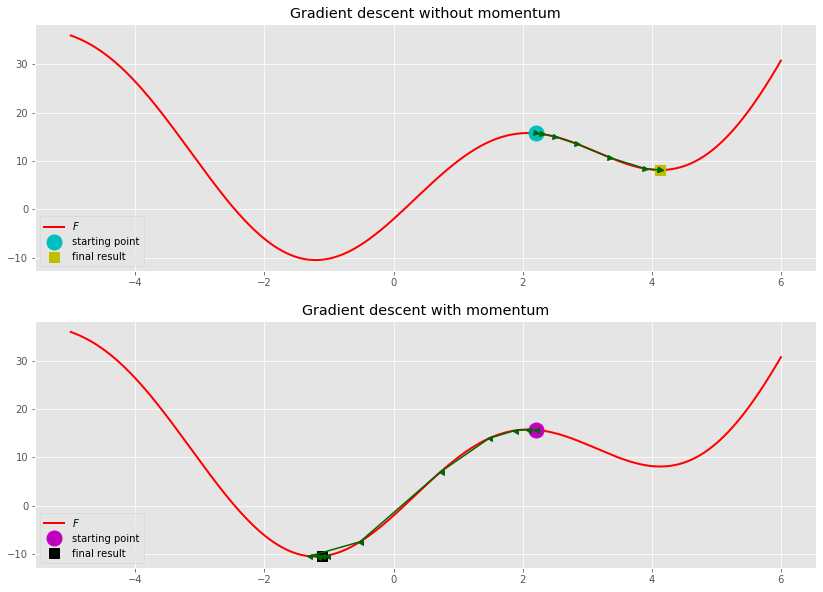

In [24]:
t = np.linspace(-5, 6, 1000)

F = cost(t)

plt.figure(figsize = (14, 10))
plt.subplot(211)
plt.plot(t, F, color = 'red', linewidth = 2, label = '$F$')
plt.plot(x[0], cost(x[0]), 'co', label = 'starting point', markersize = 15)
plt.plot(x[-1], cost(x[-1]), 'ys', label = 'final result', markersize = 10)
plt.plot(x, [cost(u) for u in x], color = 'darkgreen', marker = '>', markersize = 5)
plt.title("Gradient descent without momentum")
plt.legend()

plt.subplot(212)
plt.plot(t, F, color = 'red', linewidth = 2, label = '$F$')
plt.plot(y[0], cost(y[0]), 'mo', label = 'starting point', markersize = 15)
plt.plot(y[-1], cost(y[-1]), 'ks', label = 'final result', markersize = 10)
plt.plot(y, [cost(u) for u in y], color = 'darkgreen', marker = '<', markersize = 5)
plt.title("Gradient descent with momentum")
plt.legend()

### 3.2. Nesterov accelerated gradient.

However, a ball that rolls down a hill, blindly following the slope, is highly unsatisfactory. We'd like to have a smarter ball, a ball that has a notion of where it is going so that it knows to slow down before the hill slopes up again.

Nesterov accelerated gradient (NAG) is a way to give our momentum term this kind of prescience. We know that we will use our momentum term $\gamma v_{t-1}$ to move the parameters $\theta$.

Computing $\theta - \gamma v_{t-1}$ thus gives us an approximation of the next position of the parameters (the gradient is missing for the full update), a rough idea where our parameters are going to be. We can now effectively look ahead by calculating the gradient not w.r.t. to our current parameters $\theta$ but w.r.t. the approximate future position of our parameters:

$$ \begin{array}{ccl} v_{t+1} &=& \gamma v_t + \eta \nabla_{\theta} J \left( \theta_t - \gamma v_t \right) \\ \theta_{t+1} &=& \theta_t - v_t\end{array} $$

https://cs231n.github.io/assets/nn3/nesterov.jpeg

Again, we set the momentum term $\gamma$ to a value of around `0.9`. While Momentum first computes the current gradient and then takes a big jump in the direction of the updated accumulated gradient (big blue vector), NAG first makes a big jump in the direction of the previous accumulated gradient (brown vector), measures the gradient and then makes a correction (red vector), which results in the complete NAG update (green vector). This anticipatory update prevents us from going too fast and results in increased responsiveness, which has significantly increased the performance of RNNs on a number of tasks

In [25]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + 0.2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)

def cost(w):
    return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
    return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

### define the score funtion for regression
def mo_GD(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1])
        w_new = w[-1] - v_new
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_mm, it_mm) = mo_GD(w_init, grad, .5, 0.9)


## Define new NAG
def NAGD(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1] - gamma*v[-1])
        w_new = w[-1] - v_new
#         print(np.linalg.norm(grad(w_new))/len(w_new))
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_mm, it_mm) = NAGD(w_init, grad, .5, 0.9)

N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

Checking gradient... True


In [26]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif2(eta, gamma):
    (w, it) = mo_GD(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(6, 6))    
    plt.cla()
    plt.axis([1, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'LR_GDmomentum_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

def save_gif3(eta, gamma):
    (w, it) = NAGD(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(6, 6))    
    plt.cla()
    plt.axis([1, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'LR_NAGD_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

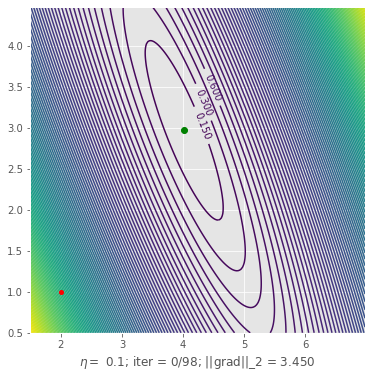

In [27]:
eta = 0.1
gamma = .9
save_gif2(eta, gamma)

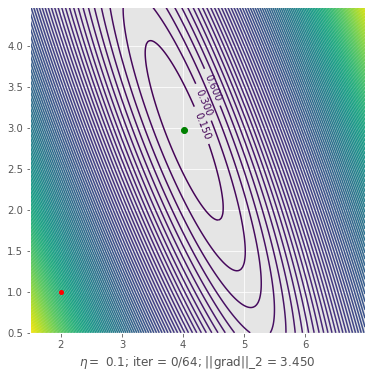

In [28]:
save_gif3(eta, gamma)

### 3.3. Adam.

`Adaptive Moment Estimation (Adam)` is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients $v_t$ like `Adadelta` and `RMSprop`, Adam also keeps an exponentially decaying average of past gradients $m_t$, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. We compute the decaying averages of past and past squared gradients $m_t$ and $v_t$ respectively as follows:

$$ \begin{array}{ccl} m_{t}	&=& \beta_{1}m_{t-1}+\left(1-\beta_{1}\right)g_{t} \\ v_{t}&=&\beta_{2}v_{t-1}+\left(1-\beta_{2}\right)g_{t}^{2} \end{array} $$

$m_t, v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively, hence the name of the method. As $m_t$ and $v_t$ are initialized as vectors of 0's, the authors of Adam observe that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small (i.e. $\beta_1$ and $\beta_2$ are close to 1).

They counteract these biases by computing bias-corrected first and second moment estimates:
$$ \begin{array}{ccc} \hat{m}_{t} & = & \dfrac{m_{t}}{1-\beta_{1}^{t}} \\ \hat{v}_{t} & = & \dfrac{v_{t}}{1-\beta_{2}^{t}} \end{array} $$

They then use these to update the parameters just as we have seen in Adadelta and RMSprop, which yields the Adam update rule:

$$ \theta_{t+1}=\theta_{t}-\eta\hat{m}_{t}\left(\hat{v_{t}}+\epsilon\right)^{-1/2} $$

The authors propose default values of 0.9 for $\beta_1$, 0.999 for $\beta_2$, and $10^{−8}$ for $\epsilon$. They show empirically that Adam works well in practice and compares favorably to other adaptive learning-method algorithms.

In [29]:
from keras import optimizers

optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2 = 0.999, amsgrad=False)

Using TensorFlow backend.


### 3.4. The others algorithm

#### Adagrad
$$ \begin{array}{ccl} g_{t,i} & = & \nabla_{\theta}J\left(\theta_{t,i}\right)\\ \theta_{t+1,i} & = & \theta_{t,i}-\eta g_{t,i}\\  & = & \theta_{t,i}-\dfrac{\eta}{\sqrt{G_{t,ii}+\epsilon}}g_{t,i} \end{array} $$

where
- $g_t$ denote the gradient at time step $t$.
- $g_{t,i}$ is then the partial derivative of the objective function w.r.t. to the parameter $\theta_i$ at time step $t$ 
- $G_t \in \mathbb{R}^{d \times d}$ is a diagonal matrix where each diagonal element is the sum of the squares of the gradients w.r.t. $\theta_i$ up to time step $t$
- $\epsilon$ is a smoothing term that avoids division by zero (`default = 10e-8`)

Hence,
$$ \theta_{t+1} = \theta_t - \dfrac{\eta}{\sqrt{G_{t}+\epsilon}} \circ g_{t} $$
where $\circ$ be a matrix-vector product.

In [30]:
optimizers.Adagrad(learning_rate=0.01)

#### Adadelta
`Adadelta` is an extension of `Adagrad` that seeks to reduce its aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to some fixed size $\omega$. Instead of inefficiently storing $\omega$ previous squared gradients, the sum of gradients is recursively defined as a decaying average of all past squared gradients. The running average $E[g^2]_t$ at time step $t$ then depends (as a fraction 
$\gamma$ similarly to the Momentum term) only on the previous average and the current gradient:

$$ E[g^2]_{t+1} = \gamma E[g^2]_{t} - (1 - \gamma) g_t^2. $$
 
We set $\gamma$ to a similar value as the momentum term, around 0.9. For clarity, we now rewrite our vanilla SGD update in terms of the parameter update vector $\Delta \theta_t$:

$$ \begin{array}{ccl} \Delta \theta_t &=& -\eta g_{t, i} \\ \theta_{t+1} &=& \theta_t + \Delta \theta_t \end{array} $$

The parameter update vector of Adagrad that we derived previously thus takes the form:

$$ \Delta_t = \theta_{t+1} - \theta_t = - \dfrac{\eta}{\sqrt{G_{t}+\epsilon}} \circ g_{t} $$

We now simply replace the diagonal matrix $G_t$ with the decaying average over past squared gradients $E[g^2]_t$

$$ \Delta_t = - \dfrac{\eta}{ \text{RMS}[g_t]} \circ g_{t} $$

where `RMS` is the `root mean squared (RMS)` error criterion of the gradient; $\text{RMS}(x) = \sqrt{E[g^2]_t + \epsilon}$ 

The authors note that the units in this update (as well as in SGD, Momentum, or Adagrad) do not match, i.e. the update should have the same hypothetical units as the parameter. To realize this, they first define another exponentially decaying average, this time not of squared gradients but of squared parameter updates:

$$ E[ \Delta \theta^2 ]_{t+1} = \gamma E[ \Delta \theta^2]_t - (1 - \gamma) \Delta \theta_t^2. $$

Since $\text{RMS}[\Delta_{t}] = \sqrt{E[\Delta \theta^2]_t + \epsilon}$ is unknown, we approximate it with the RMS of parameter updates until the previous time step. Replacing the learning rate $\eta$ in the previous update rule with $\text{RMS}[\Delta_{t-1}]$ finally yields the Adadelta update rule:

$$ \begin{array}{ccl} \Delta\theta_{t} & = & -\dfrac{\text{RMS}\left[\Delta\theta_{t-1}\right]}{\text{RMS} \left[g_{t} \right]} g_{t} \\ \theta_{t+1} & = & \theta_{t}+\Delta\theta_{t}
\end{array} $$

With Adadelta, we do not even need to set a `default learning rate`, as it has been eliminated from the update rule.

In [31]:
optimizers.Adadelta()

#### RMSprop

RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates. RMSprop in fact is identical to the first update vector of Adadelta that we derived above:

$$ \begin{array}{ccl} E[ \Delta \theta^2 ]_{t+1} &=& 0.9 E[ \Delta \theta^2]_t - 0.1 \Delta \theta_t^2. \\ \theta_{t+1} &=& \theta_t - \dfrac{\eta}{\sqrt{E[g_{t}]^2+\epsilon}} \circ g_{t} \end{array} $$

RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests $\gamma$ to be set to 0.9, while a good default value for the learning rate $\eta$ be 1e-3.

In [32]:
optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#### AdaMax

In [33]:
optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

#### Nadam


In [34]:
optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

#### AMSGrad

In [35]:
optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)

#### AdamW

Ref: https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/AdamW

#### QHAdam

Ref: https://facebookresearch.github.io/qhoptim/_modules/qhoptim/tf/qhadam.html